In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Reading the data

In [2]:
data = pd.read_csv('data.csv')
data.head()

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


### Converting to apt datatype and removing bad values

In [3]:
data.value = pd.to_numeric(data.value, errors='coerce')
data.report_date = pd.to_datetime(data.report_date, errors = 'coerce')

### Question 1. Show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration


In [4]:
q1 = data[(data.data_field_code == 'AR0005') & (data.location == 'Argentina-Catamarca' )]
q1

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,14.0,cases
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15.0,cases
304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15.0,cases
448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15.0,cases
592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15.0,cases
736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15.0,cases
880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,16.0,cases
1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15.0,cases
1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,16.0,cases
1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,NaN,NaN,15.0,cases


### Question 2. Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference.
HINT : Plot sum of the 'value' where 'units' = 'cases' to identify the difference for the locations 'Argentina-CABA' and 'Argentina-Catamarca' for entire duration.


### Extracting values

In [5]:
#Extracting all three locations as they will be used in further questions

data_to_plot = data[(data.unit=='cases') &
                    ((data.location == 'Argentina-Catamarca' )|
                     (data.location == 'Argentina-CABA')| 
                     (data.location == 'Argentina-Buenos_Aires'))]

### Grouping by report_date and location

In [6]:
q2 = data_to_plot.groupby(['report_date','location'])['value'].sum()

"Using reset index to remove location from the index as use it as a column"
q2 = q2.reset_index(level='location')

"Using data.pivot method to use different locations as columns "
q2 = q2.pivot(columns='location')


q2.head()

value                                   
location    Argentina-Buenos_Aires Argentina-CABA Argentina-Catamarca
report_date                                                          
2016-03-19                   130.0           78.0                14.0
2016-03-26                   148.0           92.0                15.0
2016-04-02                   190.0           94.0                15.0
2016-04-09                   199.0           97.0                15.0
2016-04-16                   207.0           98.0                15.0

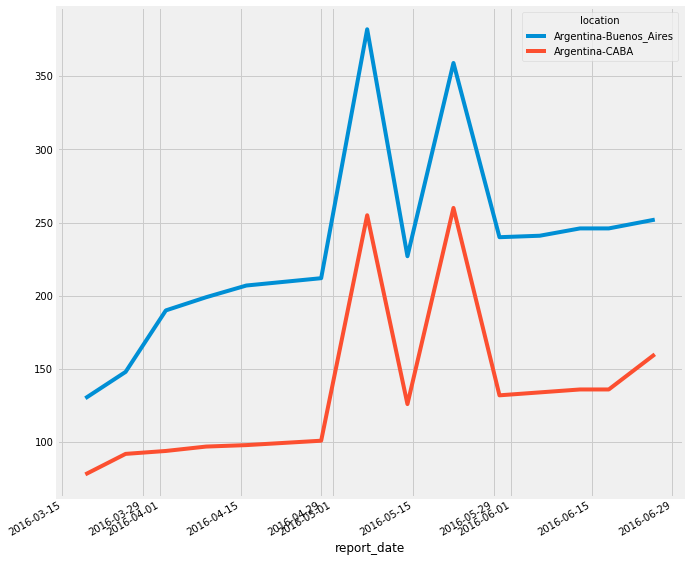

In [7]:
q2.value[q2.value.columns[:2]].plot(figsize=(10,10))

### 3. Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'


In [8]:
q3 = data_to_plot.groupby(['data_field','location'])['value'].sum()
q3 = q3.reset_index(level='location').pivot(columns='location')
q3

value                 \
location                            Argentina-Buenos_Aires Argentina-CABA   
data_field                                                                  
cumulative_cases_discarded                           251.0           27.0   
cumulative_cases_under_study                        2981.0         1748.0   
cumulative_confirmed_imported_cases                   32.0          124.0   
cumulative_confirmed_local_cases                       0.0            0.0   
cumulative_probable_imported_cases                    15.0            0.0   
cumulative_probable_local_cases                        0.0            0.0   

                                                         
location                            Argentina-Catamarca  
data_field                                               
cumulative_cases_discarded                          0.0  
cumulative_cases_under_study                      212.0  
cumulative_confirmed_imported_cases                 0.0  
cumulative_confirmed_local_cases                    0.0  
cumulative_probable_imported_cases                  0.0  
cumulative_probable_local_cases                     0.0

## Case-wise distribution in each area

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf892d2080>],
      dtype=object)

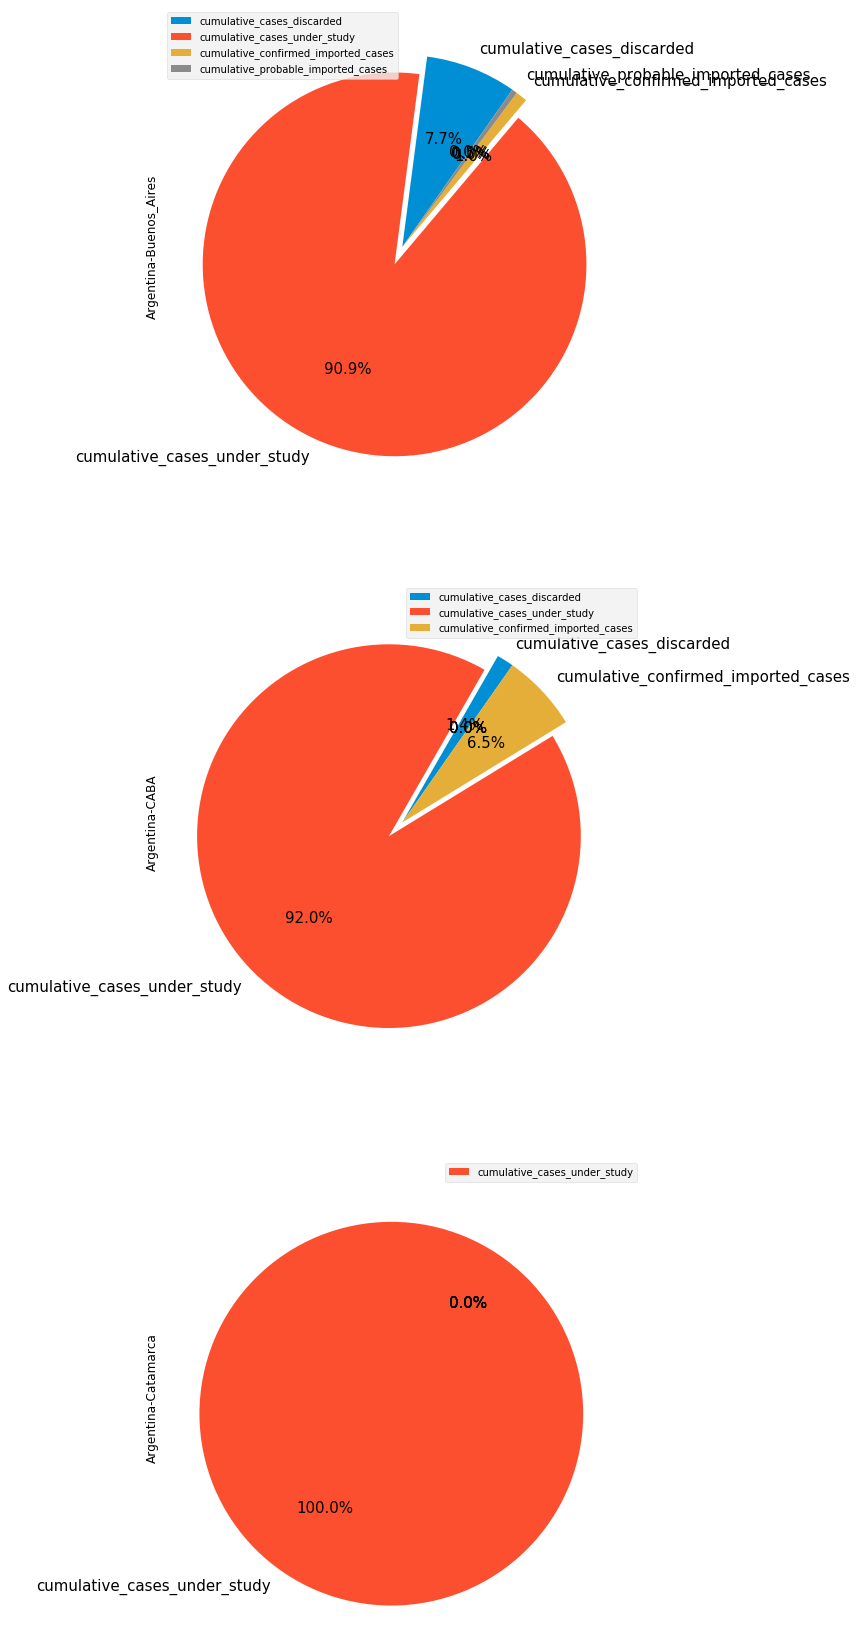

In [9]:
q3.value.plot.pie(subplots=True,layout=(3, 1),startangle=55,legend=True,
                  figsize=(30,30),autopct='%1.1f%%',shadow=False,center=(0,10),
                  labeldistance=1.1,fontsize=15,explode=(0,0.1,0,0,0,0))


## Area wise Distribution of cases

Text(0.5, 1.0, 'Area wise Distribution of cases')

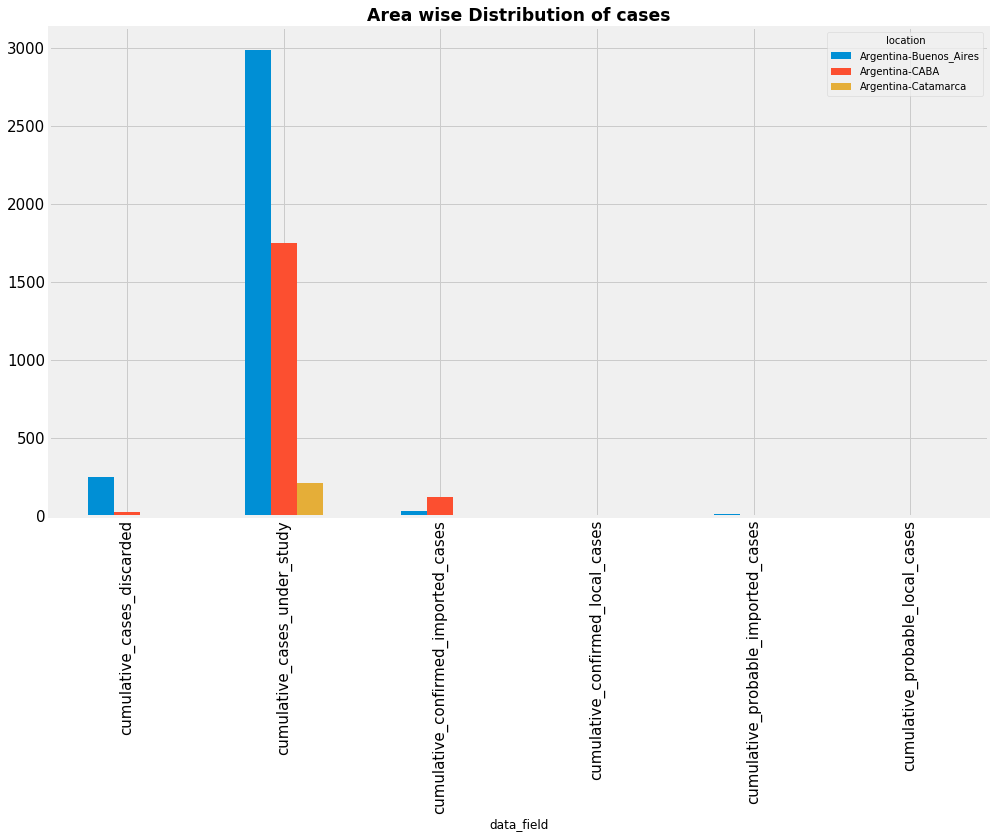

In [10]:
q3.value.plot(kind='bar',figsize=(15,9),fontsize=15)
plt.title('Area wise Distribution of cases',fontdict = {'fontsize': 'xx-large','fontweight' : 'bold'})

### 4. Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good
Hint : identify most common mistakes that can occur during typing and use big text corpus(big.txt)


In [11]:
import re
import string
from collections import Counter

"Finding all unique words from the text"
list_of_words = re.findall('[a-z]+', open('big.txt').read().lower())

"Using counter to find frequency of all words"
word_count = Counter(list_of_words)
list_of_words = set(list_of_words)

In [12]:
new_dict = {}

"Function which returns all wordswhich can be formed by deleting 1 character from word"
def one_edit(word):
    pairs   = set([(word[:i], word[i:]) for i in range(len(word)+1)] )   
    return set([ a+b[1:]           for (a, b) in pairs if b]  )

"Function to map all incorrect words to their correct alternatives"
def populate():
    
    for word in list_of_words:
        set1 = one_edit(word)
        set2    = set([e2 for e1 in set1 for e2 in one_edits(e1)])
        total_set = set1 or set2
        
        for key in total_set:
            new_dict.setdefault(key,[]).append(word)
    return 

populate()

NameError: name 'one_edits' is not defined

In [ ]:
def search(wrong):
    values = []
    
    "Searching if query occurs in the dictionary directly"
    if wrong in list_of_words:
         return wrong
            
    "Searching if query exists in new list of incorrect words"
    if wrong in new_dict.keys():
            values.extend(new_dict[wrong])
            
    "Now finding incorrect alternatives for query and then repaeting the same search for each of them"
    for word in one_edit(wrong):
        if word in new_dict.keys():
            values.extend(new_dict[word])
           
        if word in list_of_words:
            values.append(word)
    
    "If there are certain candidates, finding the maximum used candidate in text"
    if values:
        values = list(set(values))
        values.sort(key = word_count.get, reverse = True)
        print("Most probable word is: ",values[0])
        print('Other suggestions are: ',*values[1:])
        return max(set(values), key=word_count.get)
       
    else: 
        "If nothing is found returning the query itself"
        return wrong

In [ ]:
search('wester')

## Using python library for the same

In [ ]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [ ]:
def correct(word):
    print("Most probable word is ",spell.correction(word))
    print("Other suggestions are: ",*list(spell.candidates(word))[:5])

In [ ]:
correct('we5t')